In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from sklearn.metrics import mean_squared_error 

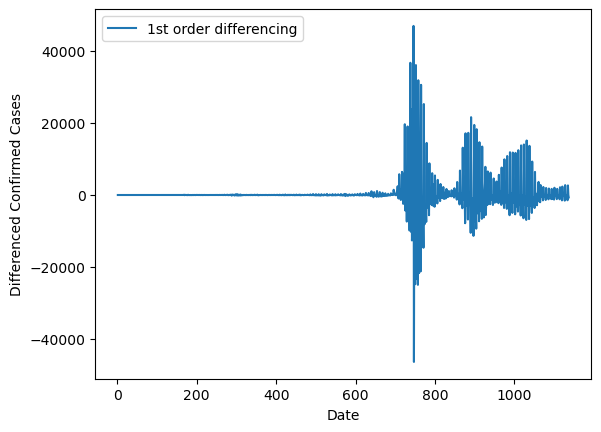

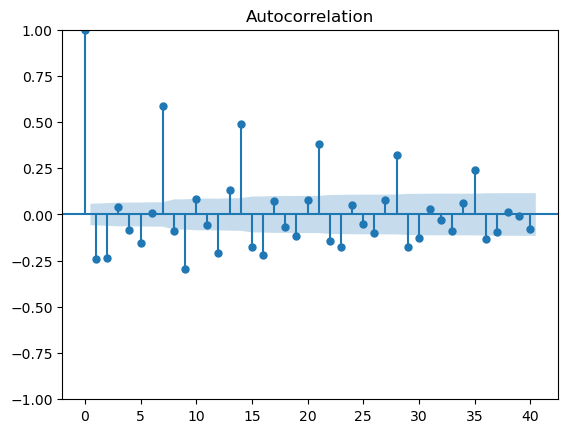

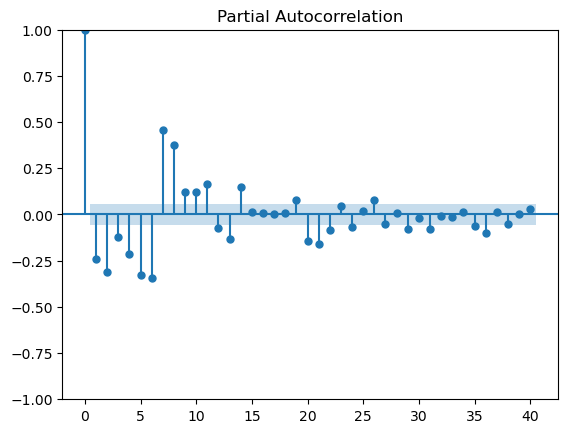

In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Load data
data = pd.read_csv('finaldata2.csv', encoding='UTF-8')

# Perform first-order differencing
diff = data['new'].diff().dropna()

# Plot first-order differenced time series
plt.plot(diff.index, diff.values, label='1st order differencing')
plt.xlabel('Date')
plt.ylabel('Differenced Confirmed Cases')
plt.legend()
plt.show()

# Plot ACF and PACF for first-order differenced time series
plot_acf(diff, lags=40, ax=plt.gca())
plt.show()
plot_pacf(diff,lags=40, ax=plt.gca())
plt.show()

In [ ]:
# p값 7로 결정 

In [23]:
model = SARIMAX(data['new'], order=(7, 1, 4), seasonal_order=(0, 0, 0, 0))
result = model.fit()
aic = result.aic
aic

21379.180354386823

In [24]:
model = SARIMAX(data['new'], order=(7, 1, 6), seasonal_order=(0, 0, 0, 0))
result = model.fit()
aic = result.aic
aic

21357.60209173619

In [28]:
for i in range(0,10):
    model = SARIMAX(data['new'], order=(7, 1, i), seasonal_order=(0, 0, 0, 0))
    result = model.fit()
    aic = result.aic
    bic = result.bic
    print(i,(aic, bic))

0 (21608.627020797598, 21648.916208747603)
1 (21433.200916926813, 21478.526253370568)
2 (21425.059675781544, 21475.42116071905)
3 (21407.047488636737, 21462.445122067995)
4 (21379.180354386823, 21439.61413631183)
5 (21374.24852883666, 21439.718459255415)
6 (21357.60209173619, 21428.1081706487)
7 (21359.023513404594, 21434.565740810853)


C:\Users\cute2\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


8 (21340.386905721716, 21420.965281621724)
9 (21346.367226653798, 21431.98175104756)
